In [1]:
# change the cell width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import pandas as pd
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns', None)

In [3]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
import matplotlib as mpl
mpl.style.use('bmh')

In [4]:
import scipy.stats as stats
from scipy.stats import zscore
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, binarize, MinMaxScaler
from sklearn.model_selection import train_test_split,RandomizedSearchCV, KFold, cross_val_score, GridSearchCV, StratifiedKFold, cross_val_predict
from sklearn.metrics import roc_curve,roc_auc_score, accuracy_score, cohen_kappa_score, jaccard_score, confusion_matrix, plot_confusion_matrix, precision_score, recall_score, classification_report
from scipy.stats import shapiro , levene , mannwhitneyu , chi2_contingency , chisquare, f_oneway
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
import xgboost as xgb

from warnings import filterwarnings
filterwarnings('ignore')

# Read the Datasets

In [5]:
df_final_train = pd.read_csv("final_train.csv")
df_final_train.head()

,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Fast Food,Main Course,Beverage,Desert,Place_Bangalore,Place_Delhi,Place_Gurgaon,Place_Hyderabad,Place_Kolkata,Place_Mumbai,Place_Noida,Place_Pune,Delivery_Time_mins
0,200.0,50.0,3.5,12.0,4.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,30.0
1,100.0,50.0,3.5,11.0,4.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0
2,150.0,50.0,3.6,99.0,30.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,65.0
3,250.0,99.0,3.7,176.0,95.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,30.0
4,200.0,99.0,3.2,521.0,235.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,65.0


In [6]:
df_final_test = pd.read_csv("final_test.csv")
df_final_test.head()

,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Fast Food,Main Course,Beverage,Desert,Place_Bangalore,Place_Delhi,Place_Gurgaon,Place_Hyderabad,Place_Kolkata,Place_Mumbai,Place_Noida,Place_Pune,Delivery_Time_mins
0,350.0,50.0,4.20000,361.000000,225.000000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,100.0,50.0,3.57619,202.714286,43.619048,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2,100.0,50.0,3.60000,36.000000,16.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN
3,200.0,50.0,3.60000,66.000000,33.000000,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4,150.0,50.0,2.90000,38.000000,14.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN


# Train Test Split 

In [7]:
# We will work on the df_final_train (train) dataset and predict on the df_final_test (test) dataset

In [8]:
X_train = df_final_train.drop("Delivery_Time_mins", axis = 1)
y_train = df_final_train["Delivery_Time_mins"]

In [9]:
X_test = df_final_test.drop("Delivery_Time_mins", axis = 1)
# y_test = df_final_train["Delivery_Time_mins"]

# Evaluate Target Class

In [10]:
# The classes seem to be imbalanced, lets us further prove this
y_train.value_counts()

30.0     7406
45.0     2665
65.0      923
120.0      62
20.0       20
80.0       14
10.0        4
Name: Delivery_Time_mins, dtype: int64

In [11]:
y_train.value_counts(normalize=True)*100

30.0     66.756805
45.0     24.021994
65.0      8.319813
120.0     0.558861
20.0      0.180278
80.0      0.126194
10.0      0.036056
Name: Delivery_Time_mins, dtype: float64

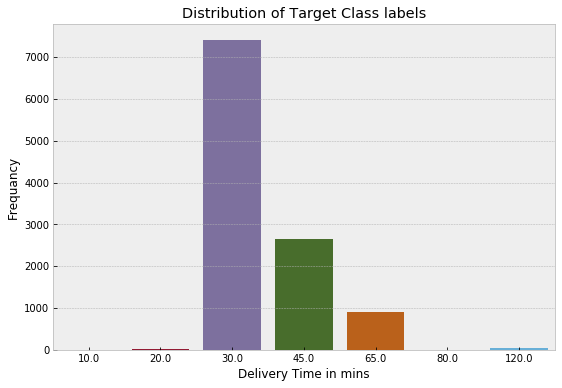

In [12]:
plt.figure(figsize=(9, 6))
sns.countplot(y_train)
plt.xlabel('Delivery Time in mins')
plt.ylabel("Frequancy")
plt.title("Distribution of Target Class labels")
plt.show()

In [13]:
# We clearly see that the Target labels are imbalanced (<20% of data), so we will have to balance it.

# Handling Class Imbalance

In [14]:
# Let us use SMOT (Over-Sampling) technique to balance the data.
# We will use it only on the train data succh that the predicted data is more generalized than overfit

In [15]:
# we get the error "Expected n_neighbors <= n_samples,  but n_samples = 3, n_neighbors = 6"
# Let us use 

In [16]:
y_train.value_counts()

30.0     7406
45.0     2665
65.0      923
120.0      62
20.0       20
80.0       14
10.0        4
Name: Delivery_Time_mins, dtype: int64

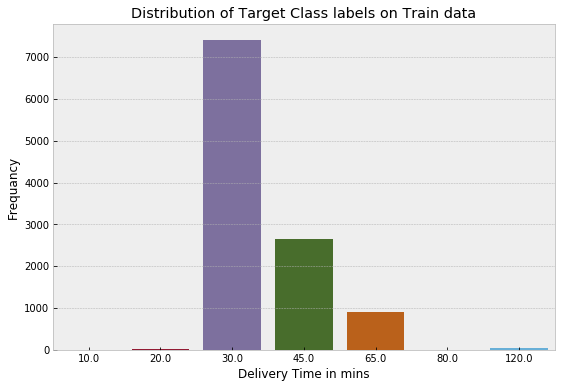

In [17]:
plt.figure(figsize=(9, 6))
sns.countplot(y_train)
plt.xlabel('Delivery Time in mins')
plt.ylabel("Frequancy")
plt.title("Distribution of Target Class labels on Train data")
plt.show()

## Synthetic Minority Oversampling Technique (SMOTE)

In [18]:
from imblearn.over_sampling import SMOTE

smt = SMOTE(random_state=0, k_neighbors=3)
X_train_SMOTE, y_train_SMOTE = smt.fit_sample(X_train, y_train)

In [19]:
# Our SMOT result gave an error "ValueError: Expected n_neighbors <= n_samples,  but n_samples = 3, n_neighbors = 6"
# we have the option to remove the minority target labels or use another oversampling technique

# we further used k_neighbors as (2) as n_neighbors=6 > n_samples din't work.

# We can also use Random Over Sampling technique which will not give us the problem, as it does not use N Nearest neighbours for sampling.

In [20]:
y_train_SMOTE.value_counts()

120.0    7406
80.0     7406
20.0     7406
10.0     7406
45.0     7406
65.0     7406
30.0     7406
Name: Delivery_Time_mins, dtype: int64

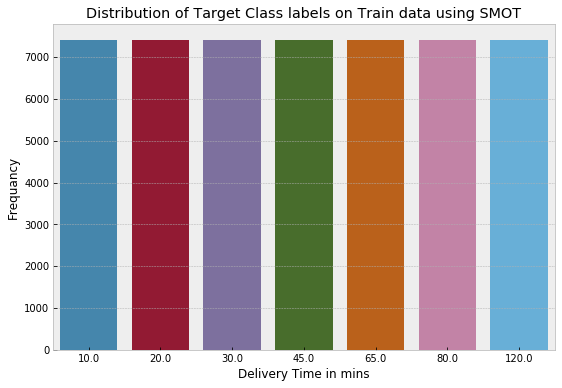

In [21]:
plt.figure(figsize=(9, 6))
sns.countplot(y_train_SMOTE)
plt.xlabel('Delivery Time in mins')
plt.ylabel("Frequancy")
plt.title("Distribution of Target Class labels on Train data using SMOT")
plt.show()

# User-Defined Functions 

## Finding Optimal Parameters

### Randomized Search CV

In [22]:
# function for applying random search cv
def random_search_cv(X_train, y_train, model, params):
    global RS_best_est, RS_best_params, cv_results_rs
    sk = StratifiedKFold(n_splits=3, random_state=0, shuffle=True)
    RS = RandomizedSearchCV(model, params, random_state = 0, n_iter = 100, scoring='f1_weighted', cv = sk, verbose=2, n_jobs=-1, return_train_score=True)
    RS.fit(X_train, y_train)
    print("\n\nBest Parameters:\n", RS.best_params_) 
    print("\n\nBest Estimator:\n", RS.best_estimator_)
    print("\n\nBest Score:\n", RS.best_score_)
    print("\n\nBest Index:\n", RS.best_index_)
    print("\n\nScorer:\n", RS.scorer_)
    # Best Estimator
    RS_best_est = RS.best_estimator_
    RS_best_params = RS.best_params_
    # cv results
    cv_results_rs = pd.DataFrame(RS.cv_results_)
    return RS_best_est, RS_best_params 

### GridSearch CV

In [23]:
# function for applying grid search cv
def grid_search_cv(X_train, y_train, model, params):
    global GS_best_est, GS_best_params, cv_results_gs
    sk = StratifiedKFold(n_splits=3, random_state=0, shuffle=True)
    GS = GridSearchCV(estimator = model, param_grid = params, scoring='f1_weighted', cv = sk, verbose=2, n_jobs=-1, return_train_score=True)
    GS.fit(X_train, y_train)
    print("\n\nBest Parameters:\n", GS.best_params_) 
    print("\n\nBest Estimator:\n", GS.best_estimator_)
    print("\n\nBest Score:\n", GS.best_score_)
    print("\n\nBest Index:\n", GS.best_index_)
    print("\n\nScorer:\n", GS.scorer_)
    # Best Estimator
    GS_best_est = GS.best_estimator_
    GS_best_params = GS.best_params_
    # cv results
    cv_results_gs = pd.DataFrame(GS.cv_results_)
    return GS_best_est, GS_best_params 

## Get Scores from models

### Fit, Predict and Plotting Scores 

In [24]:
# function to  for train and test  
def fit_predict_plot(X_train, X_test, y_train, model):
    global y_pred_test
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    print('Train Data: Accuracy Score\n')
    print(accuracy_score(y_train,y_pred_train))
    print('\n\nTrain Data: Classification Report\n')
    print(classification_report(y_train,y_pred_train))
    print('\n\nTrain Data: Kappa Cohen Score\n')
    print(cohen_kappa_score(y_train,y_pred_train))
    print('\n\nTrain Data: Confusion Matrix\n')
    print(confusion_matrix(y_train,y_pred_train))
    cf_matrix = confusion_matrix(y_train,y_pred_train)
    print('\n\nTrain Data: Normalized Confusion Matrix\n')
    fig, ax = plt.subplots(figsize=(9, 8))
    plot_confusion_matrix(model,X_train,y_train, ax=ax, normalize="all")
    plt.show()
    #print(jaccard_score(y_train,y_pred_train))


### Predict CV Scores

In [25]:
# function to  for train and test  
def predict_cv(X_train, X_test, y_train, model):
    sk = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
    y_pred_train = cross_val_predict(model, X_train, y_train, cv=sk)
    
    print('Train Data: Accuracy Score\n')
    print(accuracy_score(y_train,y_pred_train))
    print('\n\nTrain Data: Classification Report\n')
    print(classification_report(y_train,y_pred_train))
    print('\n\nTrain Data: Kappa Cohen Score\n')
    print(cohen_kappa_score(y_train,y_pred_train))
    print('\n\nTrain Data: Confusion Matrix\n')
    print(confusion_matrix(y_train,y_pred_train))
    cf_matrix = confusion_matrix(y_train,y_pred_train)
    print('\n\nTrain Data: Normalized Confusion Matrix\n')
    fig, ax = plt.subplots(figsize=(9, 8))
    plot_confusion_matrix(model,X_train,y_train, ax=ax, normalize="all")
    plt.show()
    #print(jaccard_score(y_train,y_pred_train))
    
    return y_pred_train


# Modelling

## Decision Tree

### Evaluating the best Sampling Technique

#### Modelling Without Sampling

Train Data: Accuracy Score

0.9882819542094826


Train Data: Classification Report

              precision    recall  f1-score   support

        10.0       1.00      0.50      0.67         4
        20.0       1.00      0.90      0.95        20
        30.0       0.98      1.00      0.99      7406
        45.0       1.00      0.97      0.98      2665
        65.0       1.00      0.98      0.99       923
        80.0       1.00      0.93      0.96        14
       120.0       1.00      0.95      0.98        62

    accuracy                           0.99     11094
   macro avg       1.00      0.89      0.93     11094
weighted avg       0.99      0.99      0.99     11094



Train Data: Kappa Cohen Score

0.9758461254394702


Train Data: Confusion Matrix

[[   2    0    2    0    0    0    0]
 [   0   18    2    0    0    0    0]
 [   0    0 7396    8    2    0    0]
 [   0    0   88 2575    2    0    0]
 [   0    0   21    1  901    0    0]
 [   0    0    1    0    0   13    0]
 [   0 

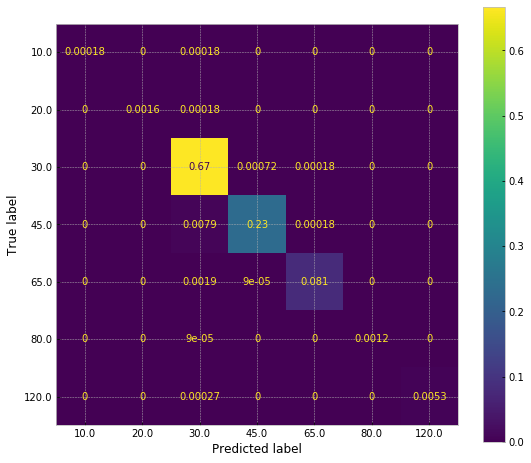

In [26]:
dt = DecisionTreeClassifier()
fit_predict_plot(X_train,X_test,y_train, dt)

#### Modelling with SMOTE

Train Data: Accuracy Score

0.9962964391805872


Train Data: Classification Report

              precision    recall  f1-score   support

        10.0       1.00      1.00      1.00      7406
        20.0       1.00      1.00      1.00      7406
        30.0       0.98      1.00      0.99      7406
        45.0       1.00      0.98      0.99      7406
        65.0       1.00      1.00      1.00      7406
        80.0       1.00      1.00      1.00      7406
       120.0       1.00      1.00      1.00      7406

    accuracy                           1.00     51842
   macro avg       1.00      1.00      1.00     51842
weighted avg       1.00      1.00      1.00     51842



Train Data: Kappa Cohen Score

0.9956791790440184


Train Data: Confusion Matrix

[[7404    0    2    0    0    0    0]
 [   0 7404    2    0    0    0    0]
 [   0    0 7385   14    7    0    0]
 [   0    0  128 7276    2    0    0]
 [   0    0   32    1 7373    0    0]
 [   0    0    1    0    0 7405    0]
 [   0 

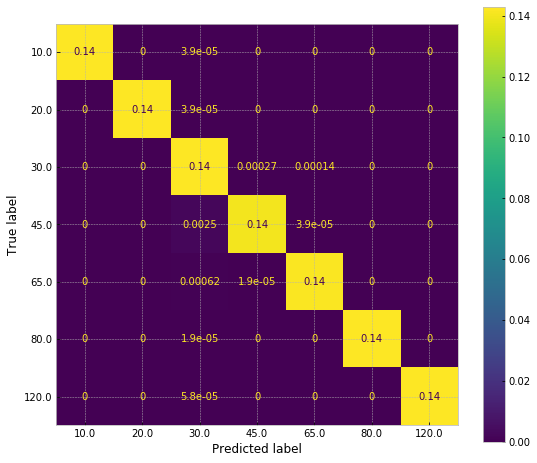

In [27]:
dt_SMOTE = DecisionTreeClassifier()
fit_predict_plot(X_train_SMOTE, X_test, y_train_SMOTE, dt_SMOTE)

### Hyper Parameter Tuning

In [28]:
from pprint import pprint

# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(dt.get_params())

Parameters currently in use:

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}


In [29]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

criterion = ['entropy','gini']
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2','int','float',None]

# Maximum number of levels in tree
#max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
#max_depth.append(None)
max_depth = range(1,50)

# Minimum number of samples required to split a node
# min_samples_split = [5, 10, 15, 20]
#min_samples_split = [4, 8, 12, 16, 20, 24, 28]
min_samples_split = range(7,30)


# Minimum number of samples required at each leaf node
min_samples_leaf = range(1,50)



# Create the random grid
random_grid = {'criterion':criterion,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf
              }

pprint(random_grid)

{'criterion': ['entropy', 'gini'],
 'max_depth': range(1, 50),
 'max_features': ['auto', 'sqrt', 'log2', 'int', 'float', None],
 'min_samples_leaf': range(1, 50),
 'min_samples_split': range(7, 30)}


#### Randomized Search CV

In [30]:
random_search_cv(X_train_SMOTE,y_train_SMOTE, dt, random_grid)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   15.8s finished




Best Parameters:
 {'min_samples_split': 19, 'min_samples_leaf': 12, 'max_features': None, 'max_depth': 48, 'criterion': 'entropy'}


Best Estimator:
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=48, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=19,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


Best Score:
 0.8718940211154692


Best Index:
 99


Scorer:
 make_scorer(f1_score, pos_label=None, average=weighted)


(DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                        max_depth=48, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=12, min_samples_split=19,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=None, splitter='best'),
 {'min_samples_split': 19,
  'min_samples_leaf': 12,
  'max_features': None,
  'max_depth': 48,
  'criterion': 'entropy'})

In [31]:
cv_restuls_rs_dt = cv_results_rs
cv_restuls_rs_dt.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.197804,0.017735,0.015957,0.000814,25,13,sqrt,46,entropy,"{'min_samples_split': 25, 'min_samples_leaf': ...",0.831956,0.836196,0.842526,0.836893,0.004343,16,0.858316,0.861902,0.872016,0.864078,0.005801
1,0.103056,0.004485,0.015958,0.001410,9,36,log2,16,gini,"{'min_samples_split': 9, 'min_samples_leaf': 3...",0.788978,0.791314,0.795509,0.791934,0.002702,48,0.805015,0.803612,0.813713,0.807447,0.004468
2,0.199798,0.004908,0.013962,0.002155,15,33,log2,18,entropy,"{'min_samples_split': 15, 'min_samples_leaf': ...",0.800085,0.788735,0.804551,0.797790,0.006658,41,0.817126,0.801411,0.824807,0.814448,0.009737
3,0.023604,0.001695,0.000000,0.000000,16,8,int,23,entropy,"{'min_samples_split': 16, 'min_samples_leaf': ...",NaN,NaN,NaN,NaN,NaN,74,NaN,NaN,NaN,NaN,NaN
4,0.064495,0.007566,0.015292,0.000470,24,12,sqrt,5,gini,"{'min_samples_split': 24, 'min_samples_leaf': ...",0.575822,0.571685,0.582183,0.576564,0.004318,62,0.575613,0.575682,0.579617,0.576971,0.001872


In [32]:
RS_best_est_dt = RS_best_est
RS_best_est_dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=48, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=19,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [33]:
RS_best_params

{'min_samples_split': 19,
 'min_samples_leaf': 12,
 'max_features': None,
 'max_depth': 48,
 'criterion': 'entropy'}

Train Data: Accuracy Score

0.9218780139655106


Train Data: Classification Report

              precision    recall  f1-score   support

        10.0       1.00      1.00      1.00      7406
        20.0       0.99      1.00      0.99      7406
        30.0       0.82      0.86      0.84      7406
        45.0       0.80      0.75      0.77      7406
        65.0       0.85      0.86      0.85      7406
        80.0       1.00      1.00      1.00      7406
       120.0       0.99      0.99      0.99      7406

    accuracy                           0.92     51842
   macro avg       0.92      0.92      0.92     51842
weighted avg       0.92      0.92      0.92     51842



Train Data: Kappa Cohen Score

0.9088576829597623


Train Data: Confusion Matrix

[[7402    0    4    0    0    0    0]
 [   0 7370   19    5   12    0    0]
 [   0   22 6340  728  295    3   18]
 [   5   26  987 5584  765   11   28]
 [   5   12  353  671 6346    0   19]
 [   0    0    1   10    9 7386    0]
 [   0 

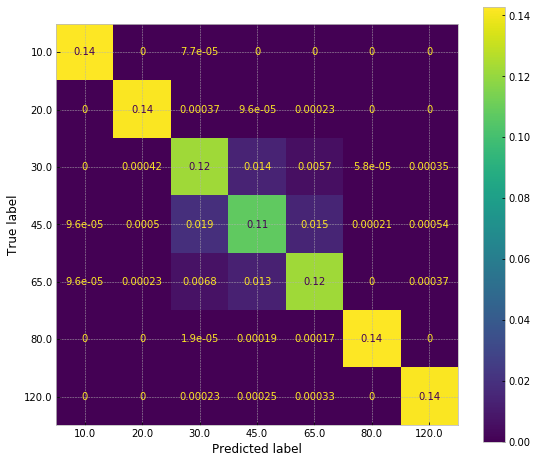

In [34]:
fit_predict_plot(X_train_SMOTE,X_test,y_train_SMOTE, RS_best_est_dt)

#### Grid Search CV

In [35]:
# Create the parameter grid based on the results of random search 

criterion = ['entropy',]
max_features = [None]
max_depth = range(20,50,5)
min_samples_split = range(7,21,1)
min_samples_leaf = range(1,20,1)

                    

param_grid = {'criterion':criterion,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

pprint(param_grid)

{'criterion': ['entropy'],
 'max_depth': range(20, 50, 5),
 'max_features': [None],
 'min_samples_leaf': range(1, 20),
 'min_samples_split': range(7, 21)}


In [36]:
grid_search_cv(X_train_SMOTE,y_train_SMOTE, dt, params=param_grid)

Fitting 3 folds for each of 1596 candidates, totalling 4788 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   30.6s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed:  9.4min
[Parallel(n_jobs=-1)]: Done 3265 tasks      | elapsed: 10.7min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed: 12.3min
[Parallel(n_jobs=-1)]: Done 4788 out of 4788 | elapsed: 13.8min finished




Best Parameters:
 {'criterion': 'entropy', 'max_depth': 25, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 7}


Best Estimator:
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=25, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


Best Score:
 0.9110944437055514


Best Index:
 266


Scorer:
 make_scorer(f1_score, pos_label=None, average=weighted)


(DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                        max_depth=25, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=7,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=None, splitter='best'),
 {'criterion': 'entropy',
  'max_depth': 25,
  'max_features': None,
  'min_samples_leaf': 1,
  'min_samples_split': 7})

In [37]:
cv_restuls_gs_dt = cv_results_gs
cv_restuls_gs_dt.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.753637,0.015739,0.014960,4.495664e-07,entropy,20,None,1,7,"{'criterion': 'entropy', 'max_depth': 20, 'max...",0.907951,0.907106,0.907926,0.907661,0.000392,19,0.970545,0.969747,0.973206,0.971166,0.001479
1,0.748997,0.007238,0.015293,9.406063e-04,entropy,20,None,1,8,"{'criterion': 'entropy', 'max_depth': 20, 'max...",0.904872,0.906632,0.906025,0.905843,0.000730,33,0.967338,0.966371,0.970045,0.967918,0.001555
2,0.764948,0.020017,0.015958,1.410852e-03,entropy,20,None,1,9,"{'criterion': 'entropy', 'max_depth': 20, 'max...",0.904956,0.904469,0.905658,0.905028,0.000488,49,0.964623,0.963965,0.967229,0.965272,0.001409
3,0.753316,0.009006,0.014961,8.143934e-04,entropy,20,None,1,10,"{'criterion': 'entropy', 'max_depth': 20, 'max...",0.903945,0.903209,0.905148,0.904101,0.000800,63,0.961228,0.960411,0.964494,0.962044,0.001764
4,0.741684,0.012360,0.017288,1.245133e-03,entropy,20,None,1,11,"{'criterion': 'entropy', 'max_depth': 20, 'max...",0.902160,0.900930,0.903328,0.902139,0.000979,94,0.958822,0.957691,0.961404,0.959306,0.001554


In [38]:
GS_best_est_dt = GS_best_est
GS_best_est_dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=25, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [39]:
GS_best_params

{'criterion': 'entropy',
 'max_depth': 25,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 7}

Train Data: Accuracy Score

0.980440569422476


Train Data: Classification Report

              precision    recall  f1-score   support

        10.0       1.00      1.00      1.00      7406
        20.0       1.00      1.00      1.00      7406
        30.0       0.93      0.97      0.95      7406
        45.0       0.96      0.93      0.95      7406
        65.0       0.98      0.96      0.97      7406
        80.0       1.00      1.00      1.00      7406
       120.0       1.00      1.00      1.00      7406

    accuracy                           0.98     51842
   macro avg       0.98      0.98      0.98     51842
weighted avg       0.98      0.98      0.98     51842



Train Data: Kappa Cohen Score

0.977180664326222


Train Data: Confusion Matrix

[[7404    0    2    0    0    0    0]
 [   0 7401    5    0    0    0    0]
 [   0    1 7220  130   53    1    1]
 [   0    1  423 6904   78    0    0]
 [   0    0  136  163 7106    0    1]
 [   0    0    1    1    0 7404    0]
 [   0   

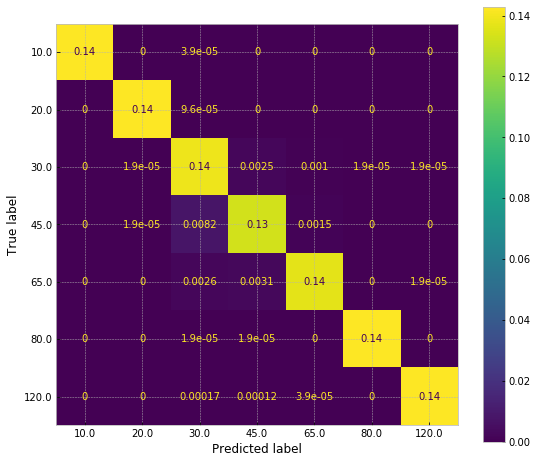

In [40]:
# Evaluating model performance ofrom Grid Search CV
fit_predict_plot(X_train_SMOTE,X_test,y_train_SMOTE, GS_best_est_dt)

#### Running the model with best parameters from GS CV

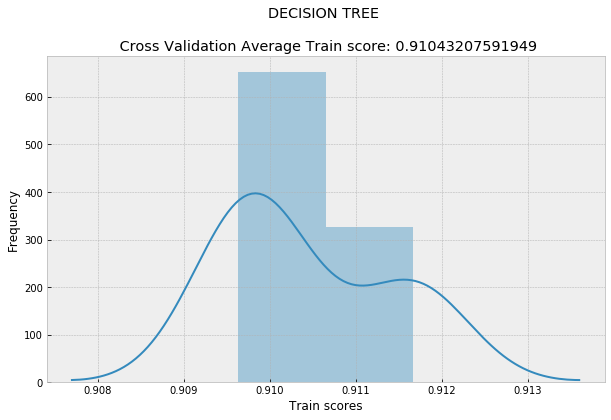

In [41]:
sk = StratifiedKFold(n_splits=3, random_state=0, shuffle=True)
cv_results = cross_val_score(GS_best_est_dt, X_train_SMOTE, y_train_SMOTE, cv=sk, scoring='f1_weighted')
plt.figure(figsize=(10,6))
sns.distplot(cv_results)
plt.xlabel('Train scores')
plt.ylabel('Frequency')
plt.title('DECISION TREE \n\n Cross Validation Average Train score: {}'.format(np.mean(cv_results)))
plt.show()

#### Making Predictions using cross validation

Train Data: Accuracy Score

0.9174414567339223


Train Data: Classification Report

              precision    recall  f1-score   support

        10.0       1.00      1.00      1.00      7406
        20.0       1.00      1.00      1.00      7406
        30.0       0.81      0.84      0.83      7406
        45.0       0.78      0.73      0.75      7406
        65.0       0.85      0.86      0.85      7406
        80.0       1.00      1.00      1.00      7406
       120.0       0.99      0.99      0.99      7406

    accuracy                           0.92     51842
   macro avg       0.92      0.92      0.92     51842
weighted avg       0.92      0.92      0.92     51842



Train Data: Kappa Cohen Score

0.9036816995229093


Train Data: Confusion Matrix

[[7403    0    3    0    0    0    0]
 [   0 7379   13    9    5    0    0]
 [   0   17 6239  834  288    9   19]
 [   1   12 1084 5427  853    7   22]
 [   1    7  351  685 6350    5    7]
 [   0    0    5    3    0 7398    0]
 [   0 

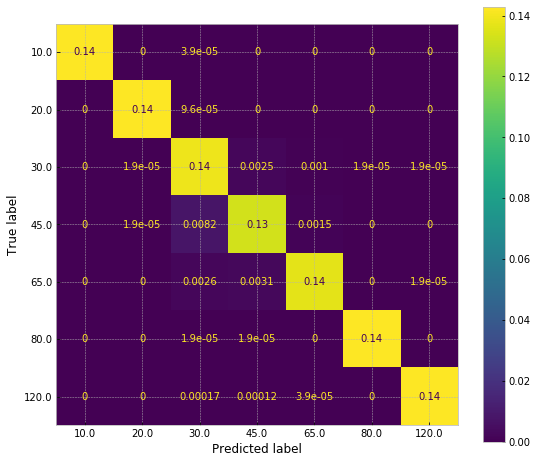

In [42]:
y_dt_pred_train = predict_cv(X_train_SMOTE, X_test, y_train_SMOTE, GS_best_est_dt)

## Random Forest 

Train Data: Accuracy Score

0.9962964391805872


Train Data: Classification Report

              precision    recall  f1-score   support

        10.0       1.00      1.00      1.00      7406
        20.0       1.00      1.00      1.00      7406
        30.0       0.98      1.00      0.99      7406
        45.0       1.00      0.98      0.99      7406
        65.0       1.00      1.00      1.00      7406
        80.0       1.00      1.00      1.00      7406
       120.0       1.00      1.00      1.00      7406

    accuracy                           1.00     51842
   macro avg       1.00      1.00      1.00     51842
weighted avg       1.00      1.00      1.00     51842



Train Data: Kappa Cohen Score

0.9956791790440184


Train Data: Confusion Matrix

[[7404    0    2    0    0    0    0]
 [   0 7404    2    0    0    0    0]
 [   0    0 7375   24    7    0    0]
 [   0    0  118 7286    2    0    0]
 [   0    0   32    1 7373    0    0]
 [   0    0    1    0    0 7405    0]
 [   0 

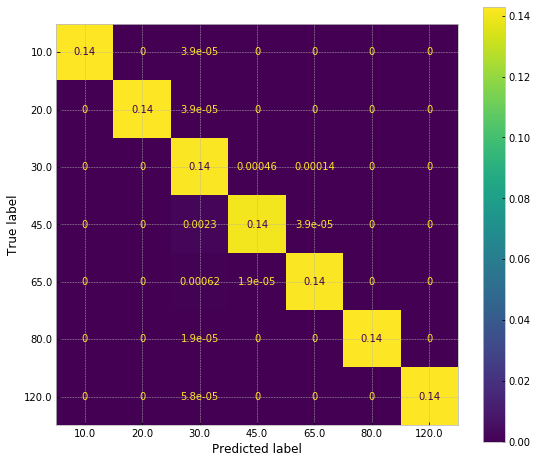

In [44]:
rf = RandomForestClassifier()
fit_predict_plot(X_train_SMOTE,X_test,y_train_SMOTE, rf)

In [45]:
# We notice that our Random Forest base model seems to be performing better than the Decision Tree (Grid Search CV)

### Hyper Parameter Tuning

In [46]:
rf = RandomForestClassifier(random_state=0)

from pprint import pprint

# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}


In [47]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
n_estimators = range(1,60)

# splitting criterion
criterion = ['entropy','gini']

# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2','int','float',None]

# Maximum number of levels in tree
#max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
#max_depth.append(None)
max_depth = range(1,50, 10)

# Minimum number of samples required to split a node
min_samples_split = range(7,50, 7)

# Minimum number of samples required at each leaf node
min_samples_leaf = range(1,50, 10)

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'criterion':criterion,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap
              }

pprint(random_grid)

{'bootstrap': [True, False],
 'criterion': ['entropy', 'gini'],
 'max_depth': range(1, 50, 10),
 'max_features': ['auto', 'sqrt', 'log2', 'int', 'float', None],
 'min_samples_leaf': range(1, 50, 10),
 'min_samples_split': range(7, 50, 7),
 'n_estimators': range(1, 60)}


### Randomized Search CV

In [48]:
random_search_cv(X_train_SMOTE,y_train_SMOTE, rf, random_grid)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   38.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  6.0min finished




Best Parameters:
 {'n_estimators': 17, 'min_samples_split': 7, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 31, 'criterion': 'gini', 'bootstrap': True}


Best Estimator:
 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=31, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, n_estimators=17,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)


Best Score:
 0.934804535720104


Best Index:
 24


Scorer:
 make_scorer(f1_score, pos_label=None, average=weighted)


(RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=31, max_features='sqrt',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=7,
                        min_weight_fraction_leaf=0.0, n_estimators=17,
                        n_jobs=None, oob_score=False, random_state=0, verbose=0,
                        warm_start=False),
 {'n_estimators': 17,
  'min_samples_split': 7,
  'min_samples_leaf': 1,
  'max_features': 'sqrt',
  'max_depth': 31,
  'criterion': 'gini',
  'bootstrap': True})

In [49]:
cv_restuls_rs_rf = cv_results_rs
cv_restuls_rs_rf.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_criterion,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,3.100378,0.015586,0.131981,0.002618,39,35,21,auto,11,gini,False,"{'n_estimators': 39, 'min_samples_split': 35, ...",0.874350,0.876080,0.872218,0.874216,0.001579,30,0.895043,0.896576,0.897687,0.896435,0.001084
1,0.061170,0.007825,0.000000,0.000000,26,28,1,int,31,entropy,True,"{'n_estimators': 26, 'min_samples_split': 28, ...",NaN,NaN,NaN,NaN,NaN,70,NaN,NaN,NaN,NaN,NaN
2,16.379375,0.815027,0.469968,0.072666,49,28,1,auto,41,entropy,False,"{'n_estimators': 49, 'min_samples_split': 28, ...",0.931952,0.933923,0.926213,0.930696,0.003270,3,0.971256,0.969236,0.970717,0.970403,0.000854
3,0.046541,0.010813,0.000000,0.000000,12,35,1,int,41,gini,True,"{'n_estimators': 12, 'min_samples_split': 35, ...",NaN,NaN,NaN,NaN,NaN,75,NaN,NaN,NaN,NaN,NaN
4,4.953757,1.222208,0.107380,0.036909,23,28,31,sqrt,41,entropy,False,"{'n_estimators': 23, 'min_samples_split': 28, ...",0.876378,0.874937,0.871212,0.874176,0.002177,31,0.898509,0.898216,0.896283,0.897669,0.000987


In [50]:
RS_best_est_rf = RS_best_est
RS_best_est_rf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=31, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, n_estimators=17,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [51]:
RS_best_params

{'n_estimators': 17,
 'min_samples_split': 7,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 31,
 'criterion': 'gini',
 'bootstrap': True}

Train Data: Accuracy Score

0.9853593611357586


Train Data: Classification Report

              precision    recall  f1-score   support

        10.0       1.00      1.00      1.00      7406
        20.0       1.00      1.00      1.00      7406
        30.0       0.93      0.98      0.96      7406
        45.0       0.98      0.95      0.96      7406
        65.0       0.99      0.97      0.98      7406
        80.0       1.00      1.00      1.00      7406
       120.0       1.00      1.00      1.00      7406

    accuracy                           0.99     51842
   macro avg       0.99      0.99      0.99     51842
weighted avg       0.99      0.99      0.99     51842



Train Data: Kappa Cohen Score

0.9829192546583851


Train Data: Confusion Matrix

[[7404    0    2    0    0    0    0]
 [   0 7398    7    1    0    0    0]
 [   0    0 7273  109   23    0    1]
 [   0    0  362 7008   36    0    0]
 [   0    0  146   61 7199    0    0]
 [   0    0    1    1    0 7404    0]
 [   0 

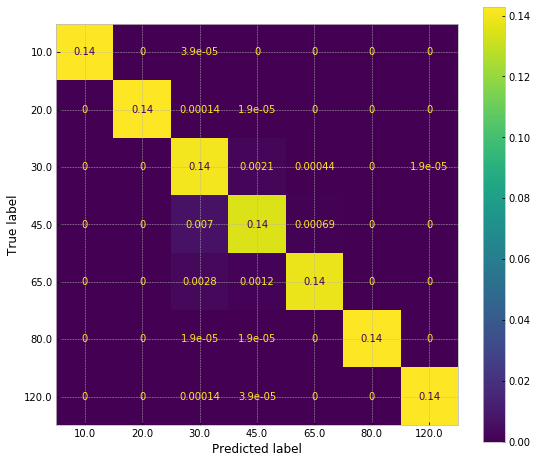

In [52]:
fit_predict_plot(X_train_SMOTE,X_test,y_train_SMOTE, RS_best_est_rf)

### Grid Search CV

In [53]:
# Create the parameter grid based on the results of random search 

n_estimators = range(1,40)
criterion = ['entropy']
max_features = ['sqrt']
max_depth = range(15,30, 10)
min_samples_split = range(7,31, 10)
min_samples_leaf = range(1,20, 10)
bootstrap = [False]

                    

param_grid = {'n_estimators':n_estimators,
              'criterion':criterion,
              'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf,
              'bootstrap': bootstrap 
              }

pprint(param_grid)

{'bootstrap': [False],
 'criterion': ['entropy'],
 'max_depth': range(15, 30, 10),
 'max_features': ['sqrt'],
 'min_samples_leaf': range(1, 20, 10),
 'min_samples_split': range(7, 31, 10),
 'n_estimators': range(1, 40)}


In [54]:
grid_search_cv(X_train_SMOTE,y_train_SMOTE, RS_best_est_rf, params=param_grid)

Fitting 3 folds for each of 468 candidates, totalling 1404 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed: 12.1min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed: 19.7min
[Parallel(n_jobs=-1)]: Done 1404 out of 1404 | elapsed: 28.2min finished




Best Parameters:
 {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 25, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 7, 'n_estimators': 32}


Best Estimator:
 RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=25, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, n_estimators=32,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)


Best Score:
 0.945475100473387


Best Index:
 265


Scorer:
 make_scorer(f1_score, pos_label=None, average=weighted)


(RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                        criterion='entropy', max_depth=25, max_features='sqrt',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=7,
                        min_weight_fraction_leaf=0.0, n_estimators=32,
                        n_jobs=None, oob_score=False, random_state=0, verbose=0,
                        warm_start=False),
 {'bootstrap': False,
  'criterion': 'entropy',
  'max_depth': 25,
  'max_features': 'sqrt',
  'min_samples_leaf': 1,
  'min_samples_split': 7,
  'n_estimators': 32})

In [55]:
cv_restuls_gs_rf = cv_results_gs
cv_restuls_gs_rf.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.227391,0.016286,0.017953,0.000815,False,entropy,15,sqrt,1,7,1,"{'bootstrap': False, 'criterion': 'entropy', '...",0.877205,0.879472,0.872266,0.876314,0.003008,451,0.928936,0.922374,0.923866,0.925059,0.002808
1,0.438583,0.023345,0.022850,0.003828,False,entropy,15,sqrt,1,7,2,"{'bootstrap': False, 'criterion': 'entropy', '...",0.902505,0.901982,0.891246,0.898578,0.005189,418,0.956046,0.949662,0.950643,0.952117,0.002807
2,0.652584,0.037786,0.027530,0.005297,False,entropy,15,sqrt,1,7,3,"{'bootstrap': False, 'criterion': 'entropy', '...",0.913310,0.914525,0.904737,0.910857,0.004356,278,0.964154,0.961859,0.961724,0.962579,0.001115
3,0.849708,0.009371,0.024144,0.002950,False,entropy,15,sqrt,1,7,4,"{'bootstrap': False, 'criterion': 'entropy', '...",0.919453,0.922193,0.910413,0.917353,0.005033,203,0.970365,0.969115,0.967160,0.968880,0.001319
4,1.039146,0.050069,0.034952,0.005295,False,entropy,15,sqrt,1,7,5,"{'bootstrap': False, 'criterion': 'entropy', '...",0.921704,0.925717,0.915663,0.921028,0.004132,181,0.972924,0.972625,0.970938,0.972162,0.000874


In [56]:
GS_best_est_rf = GS_best_est
GS_best_est_rf

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=25, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, n_estimators=32,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [57]:
GS_best_params

{'bootstrap': False,
 'criterion': 'entropy',
 'max_depth': 25,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 7,
 'n_estimators': 32}

Train Data: Accuracy Score

0.9942131862196675


Train Data: Classification Report

              precision    recall  f1-score   support

        10.0       1.00      1.00      1.00      7406
        20.0       1.00      1.00      1.00      7406
        30.0       0.97      0.99      0.98      7406
        45.0       0.99      0.98      0.99      7406
        65.0       1.00      0.99      0.99      7406
        80.0       1.00      1.00      1.00      7406
       120.0       1.00      1.00      1.00      7406

    accuracy                           0.99     51842
   macro avg       0.99      0.99      0.99     51842
weighted avg       0.99      0.99      0.99     51842



Train Data: Kappa Cohen Score

0.9932487172562787


Train Data: Confusion Matrix

[[7404    0    2    0    0    0    0]
 [   0 7402    3    0    1    0    0]
 [   0    0 7355   31   19    0    1]
 [   0    0  169 7234    3    0    0]
 [   0    0   59    7 7340    0    0]
 [   0    0    1    0    0 7405    0]
 [   0 

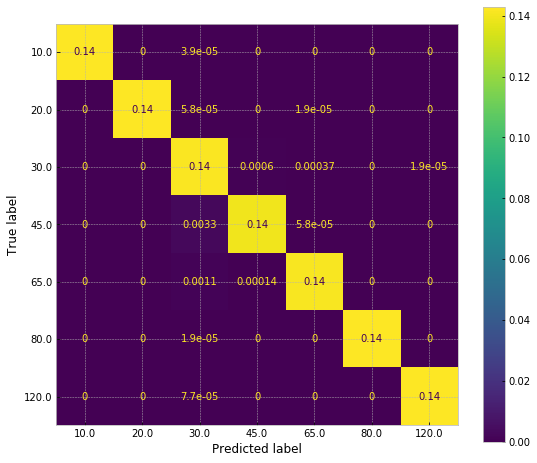

In [58]:
# Evaluating model performance ofrom Grid Search CV
fit_predict_plot(X_train_SMOTE,X_test,y_train_SMOTE, GS_best_est_rf)

In [59]:
# Prediction Scores
y_pred_test_rf = y_pred_test

### Running the model with best parameters from GS CV

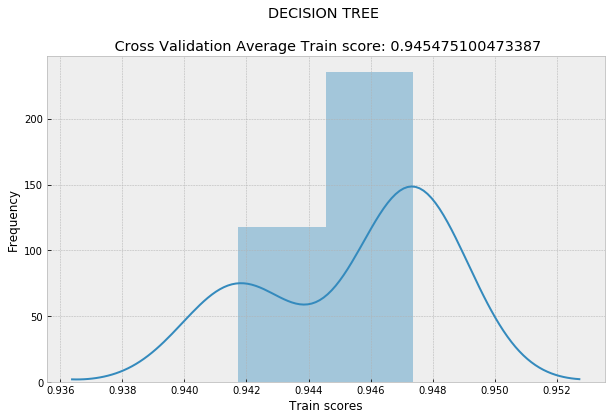

In [60]:
sk = StratifiedKFold(n_splits=3, random_state=0, shuffle=True)
cv_results = cross_val_score(GS_best_est_rf, X_train_SMOTE, y_train_SMOTE, cv=sk, scoring='f1_weighted')
plt.figure(figsize=(10,6))
sns.distplot(cv_results)
plt.xlabel('Train scores')
plt.ylabel('Frequency')
plt.title('DECISION TREE \n\n Cross Validation Average Train score: {}'.format(np.mean(cv_results)))
plt.show()

### Making Predictions using cross validation

Train Data: Accuracy Score

0.9493075112842869


Train Data: Classification Report

              precision    recall  f1-score   support

        10.0       1.00      1.00      1.00      7406
        20.0       1.00      1.00      1.00      7406
        30.0       0.85      0.91      0.88      7406
        45.0       0.87      0.83      0.85      7406
        65.0       0.94      0.91      0.92      7406
        80.0       1.00      1.00      1.00      7406
       120.0       1.00      1.00      1.00      7406

    accuracy                           0.95     51842
   macro avg       0.95      0.95      0.95     51842
weighted avg       0.95      0.95      0.95     51842



Train Data: Kappa Cohen Score

0.9408587631650014


Train Data: Confusion Matrix

[[7403    0    3    0    0    0    0]
 [   0 7391   12    2    1    0    0]
 [   0   10 6717  571  102    0    6]
 [   1    5  880 6167  345    1    7]
 [   0    6  278  364 6753    0    5]
 [   0    0    3    0    1 7402    0]
 [   0 

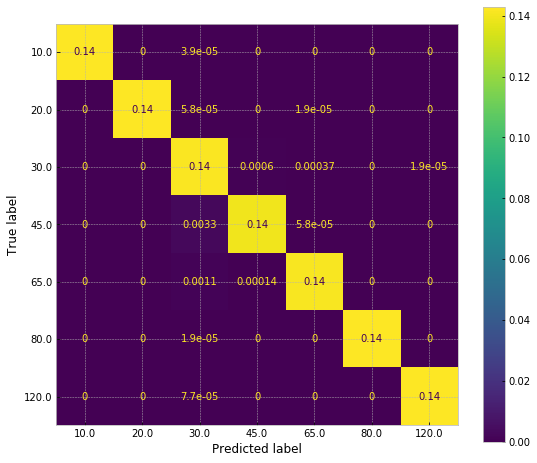

In [61]:
y_rf_pred_train = predict_cv(X_train_SMOTE, X_test, y_train_SMOTE, GS_best_est_rf)

In [62]:
# Random Forest does better than Decision Tree in terms of overall accuracy and Kappa Cohen Scores

In [63]:
# We hence conclude that our Random Forest Hyper Tuned classifier prove to be most effective.

In [66]:
# Export the imputed data to csv files 
pd.DataFrame(y_pred_test_rf).to_csv('final_test_predictions.csv', index=False, header=True)